__“If you cannot measure it, you cannot improve it”__

## Offline - having a labeled dataset and a search models at hand, evaluate performance of the models (how well was the user's information request met?)


Here we estimate the performance with respect to each particular query. In classification we will just have a list of results and will compute the metrics just once, not for each query!

Q1 : __D1__, D5, D7, D15, __D20__, __D2__, D30, D21, __D24__, D4, __D6__, __D18__ <br>
Q2 : D3, __D9__, __D11__, __D12__, D30, D7, D8, D4, D21, __D22__

In [1]:
doc_ids = list(range(30))
gold = [[1, 2, 6, 18, 20, 16, 24, 17, 3], 
        [9, 12, 4, 5, 1, 10, 22, 23, 25, 27, 11]]
query_results = [[1, 5, 7, 15, 20, 2, 30, 21, 24, 4, 6, 18], 
                 [3, 9, 11, 12, 30, 7, 8, 4, 21, 22]]

def to_vector(doc_ids, doc_set):
    return [1 if doc in doc_set else 0 for doc in doc_ids]

gold_v = [to_vector(doc_ids, _v) for _v in gold]
predicted_v = [to_vector(doc_ids, _v) for _v in query_results]

print("Gold:", gold_v[0])
print("Pred:", predicted_v[0])

Gold: [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Pred: [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0]


### Confusion Matrix:
<img src="img/cm.png" width="400">

__Diagonals is what we want to improve/increase!__

__Exercise__: Calculate the CF for the queries:<br>
Q1 : __D1__, D5, D7, D15, __D20__, __D2__, D30, D21, __D24__, D4, __D6__, __D18__ <br>
Q2 : D3, __D9__, __D11__, __D12__, D30, D7, D8, D4, D21, __D22__

In [2]:
from sklearn.metrics import confusion_matrix

for i in range(2):
    print("Query {}:".format(i))
    print(confusion_matrix(gold_v[i], predicted_v[i]))

Query 0:
[[16  5]
 [ 3  6]]
Query 1:
[[15  4]
 [ 6  5]]


### Accuracy - how many of the retrieved results are correct?

$$\frac{TP + TN}{TP + TN + FP + FN}$$

__Exercise__ : Calculate the accuracy for the two queries<br>
Q1 : __D1__, D5, D7, D15, __D20__, __D2__, D30, D21, __D24__, D4, __D6__, __D18__ <br>
Q2 : D3, __D9__, __D11__, __D12__, D30, D7, D8, D4, D21, __D22__

In [3]:
from sklearn.metrics import accuracy_score

for i in range(2):
    print("Query {}:".format(i))
    print(accuracy_score(gold_v[i], predicted_v[i]))

Query 0:
0.7333333333333333
Query 1:
0.6666666666666666


In [4]:
# Why don't we just use accuracy?!
test_dog_ids = list(range(1000))
some_gold = [1, 2, 3, 4, 5]
print(accuracy_score(to_vector(test_dog_ids, some_gold), to_vector(test_dog_ids, [1, 4, 6, 10, 11, 7])))
print(accuracy_score(to_vector(test_dog_ids, some_gold), to_vector(test_dog_ids, [])))

0.993
0.995


- In real IR systems we have __thousands of documents__. Thus, accuracy will cause our IR method to return __NO RESULTS__.
- The change __improvements__ in the IR method are __less visible__ - we already have an accuracy of 0.993!

## Precision and Recall
<img src="img/cm_pr.png" width="400">

Precision : How many of the retrieved results were useful? <br>
$$Precision = \frac{TP}{TP + FP}$$<br>  
Recall : Were there any useful pages left not retrieved?  <br>
$$Recall = \frac{TP}{TP + FN}$$ 

__Exercise:__ 
- Compute Precision and Recall for the queries:<br>
Q1 : __D1__, D5, D7, D15, __D20__, __D2__, D30, D21, __D24__, D4, __D6__, __D18__ <br>
Q2 : D3, __D9__, __D11__, __D12__, D30, D7, D8, D4, D21, __D22__<br>

- What does it mean to have a precision = 1/ recall = 1 ?
- When does precision decrease? When does recall decrease?

In [5]:
from sklearn.metrics import precision_score, recall_score

for i in range(2):
    print("Query {}:".format(i))
    print("Precision:", precision_score(gold_v[i], predicted_v[i]))
    print("Recall:", recall_score(gold_v[i], predicted_v[i]))

Query 0:
Precision: 0.5454545454545454
Recall: 0.6666666666666666
Query 1:
Precision: 0.5555555555555556
Recall: 0.45454545454545453


Which of the metrics is more important? - Usually depends on the business requirements.
- When do we get the highest recall?
- However, we can combine the metrics, using their harmonic mean! 

## F1 score
$$ F_{\beta} = \frac{(\beta^{2}+1)PR}{\beta^{2}P+R} $$

Most common F1:
$$ F_{1} = \frac{2PR}{P+R} $$


__Exercise__: Compute F1 for the queries.<br>
Q1 : __D1__, D5, D7, D15, __D20__, __D2__, D30, D21, __D24__, D4, __D6__, __D18__ <br>
Q2 : D3, __D9__, __D11__, __D12__, D30, D7, D8, D4, D21, __D22__

In [6]:
from sklearn.metrics import f1_score

for i in range(2):
    print("Query {}:".format(i))
    print("F1:", f1_score(gold_v[i], predicted_v[i]))

Query 0:
F1: 0.6
Query 1:
F1: 0.5


So far : we didn't account for the position of the correct relevant documnets in the returned list of documents!
Example: If your first page contain 20 items, you might want to optimize P@20, R@20
Did the order of the results made the user’s search for information easier or harder? 

__Exercise__: Compute P@N, R@N for N= 1, 2, 3, 4, 5<br>
Q1 : __D1__, D5, D7, D15, __D20__, __D2__, D30, D21, __D24__, D4, __D6__, __D18__ <br>
Q2 : D3, __D9__, __D11__, __D12__, D30, D7, D8, D4, D21, __D22__

In [7]:
for i in range(2):
    print("Query {}:".format(i))
    for n in range(1, 8):
        print("N:", n, end=', ')
        print("Precision:", precision_score(gold_v[i], to_vector(doc_ids, query_results[i][:n])), end=', ')
        print("Recall:", recall_score(gold_v[i], to_vector(doc_ids, query_results[i][:n])))

Query 0:
N: 1, Precision: 1.0, Recall: 0.1111111111111111
N: 2, Precision: 0.5, Recall: 0.1111111111111111
N: 3, Precision: 0.3333333333333333, Recall: 0.1111111111111111
N: 4, Precision: 0.25, Recall: 0.1111111111111111
N: 5, Precision: 0.4, Recall: 0.2222222222222222
N: 6, Precision: 0.5, Recall: 0.3333333333333333
N: 7, Precision: 0.5, Recall: 0.3333333333333333
Query 1:
N: 1, Precision: 0.0, Recall: 0.0
N: 2, Precision: 0.5, Recall: 0.09090909090909091
N: 3, Precision: 0.6666666666666666, Recall: 0.18181818181818182
N: 4, Precision: 0.75, Recall: 0.2727272727272727
N: 5, Precision: 0.75, Recall: 0.2727272727272727
N: 6, Precision: 0.6, Recall: 0.2727272727272727
N: 7, Precision: 0.5, Recall: 0.2727272727272727


Precision-Recall Curve: compute the precision achieved taking just top N of the returned results, 
    i.e. precision at different recall levels.

__Exercise__: Draw the Precision-Recall curve:<br>
Q1 : __D1__, D5, D7, D15, __D20__, __D2__, D30, D21, __D24__, D4, __D6__, __D18__ <br>
Q2 : D3, __D9__, __D11__, __D12__, D30, D7, D8, D4, D21, __D22__

In [8]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

Query 0:


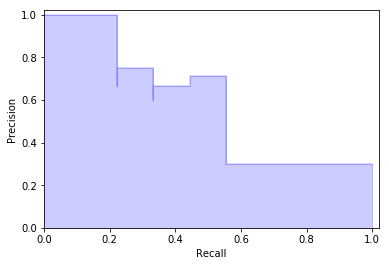

Query 1:


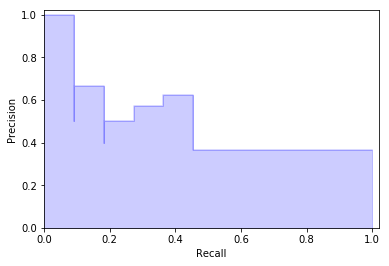

In [9]:
for i in range(2):
    print("Query {}:".format(i))
    rankings = [query_results[i].index(j)/len(doc_ids) if j in query_results[i] else 0 for j in doc_ids]
    precision, recall, _ = precision_recall_curve(gold_v[i], rankings)
    
    step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.02])
    plt.xlim([0.0, 1.02])
    plt.show()

# Other metrics:
- __R-Precision__ - having 20 relevant examples, measure precision at 20. R=20
- __Mean Reciprocal Rank__

 $$\text{MRR} = \frac{1}{|Q|} \sum_{i=1}^{|Q|}\sum_{j=1}^{|RelD_{Q}|} \frac{1}{\text{rank}_{i,j}}. $$
 
 Reciprocal Rank for the first correct document - returned __at position 1 = 1, at position 2 = 1/2,__ etc.<br>
 The reciprocal rank is low if a relevant document is returned at the end of the list with results.
 Use a variable result set cut-off for each query based on number of its relevant results.
 A perfect system can score 1.0 over all queries.
- __Mean Average Precision__ - average of the precision value obtained for the top k documents, each time a relevant doc is retrieved
     - Compute __MEAN over queries__
     - For each query, compute: __AVERAGE of the Precision@N__, computed at each relevant document
$$ AvgP = \frac{\sum_{N=1}^{|D_{Q}|} (P@N \times rel@N)}{RelD_{Q}} $$

- Even more: __discounted cumulative gain__ (DCG) - when relevance is not binary, but we may measure a degree of relevance - e.g. exact match, relevant, not relevant.

__Exercise:__ Compute MRR, MAP and R-precision for: <br>
Q1 : __D1__, D5, D7, D15, __D20__, __D2__, D30, D21, __D24__, D4, __D6__, __D18__ <br>
Q2 : D3, __D9__, __D11__, __D12__, D30, D7, D8, D4, D21, __D22__

Use the selected metric to improve the performcance on the validation set.
Once tuned, estimate the performance on the test set, too. 
The train, validation and test scores w.r.t the selected metric should help you to estimate bias/variance.
Then, it would be easier to decide whether to get more data/make more complex/simple model.

## Online metrics - see how users interact with your system

- Session abandonment rate and session success rate
- Click-through rate (CTR) 
- Satisfaction of a click - how much time is spent on a URL
- Time before clicking